In [1]:
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv
import pandas as pd
import csv
import os
import numpy as np

In [2]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions

In [10]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        
        # 1. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 2. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


In [12]:
num_coords = len(results.right_hand_landmarks.landmark)
num_coords
#

21

In [13]:
#Column headers for dataset
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val)]
landmarks

['class',
 'x1',
 'y1',
 'x2',
 'y2',
 'x3',
 'y3',
 'x4',
 'y4',
 'x5',
 'y5',
 'x6',
 'y6',
 'x7',
 'y7',
 'x8',
 'y8',
 'x9',
 'y9',
 'x10',
 'y10',
 'x11',
 'y11',
 'x12',
 'y12',
 'x13',
 'y13',
 'x14',
 'y14',
 'x15',
 'y15',
 'x16',
 'y16',
 'x17',
 'y17',
 'x18',
 'y18',
 'x19',
 'y19',
 'x20',
 'y20',
 'x21',
 'y21']

In [14]:
#Create a new file (.csv)
with open('hand_gesture_dataset.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [110]:
#Change the class_name(Name of the gesture) each time before collecting data for the gesture
class_name = "Right"

In [111]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
        
        # 1. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 2. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # Export coordinates
        try:
            # Extract x and y coordinates for the dataset
            # Change the statement while collecting data for right hand

            # right = results.right_hand_landmarks.landmark
            # right_row = list(np.array([[landmark.x, landmark.y] for landmark in right]).flatten())
            # row = right_row
            
            left = results.left_hand_landmarks.landmark
            left_row = list(np.array([[landmark.x, landmark.y] for landmark in left]).flatten())


            # Concate rows
            row = left_row

            # Append class name 
            row.insert(0, class_name)

            # Export to CSV
            with open('hand_gesture_dataset.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 

        except:
            print("row not added")
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added
row not added


In [5]:
df = pd.read_csv('hand_gesture_dataset.csv')


In [6]:
df.head()


,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21
0,Thumbs up,0.373680,0.799069,0.388514,0.796435,0.402762,0.799441,0.412974,0.804780,0.419015,...,0.389372,0.849769,0.377499,0.837131,0.383662,0.853786,0.383315,0.856933,0.381228,0.855334
1,Thumbs up,0.370640,0.799622,0.385039,0.800213,0.398063,0.807556,0.405938,0.816484,0.409253,...,0.390366,0.847975,0.375569,0.835191,0.383101,0.851477,0.383779,0.852952,0.381862,0.850957
2,Thumbs up,0.370069,0.800135,0.384324,0.799349,0.396449,0.807451,0.403068,0.817896,0.406191,...,0.389183,0.850001,0.377161,0.837823,0.384179,0.853727,0.384018,0.858729,0.382040,0.859653
3,Thumbs up,0.370308,0.799785,0.384741,0.798769,0.397003,0.806662,0.403644,0.816942,0.406910,...,0.393758,0.855514,0.376790,0.834629,0.383021,0.851258,0.383882,0.858380,0.383094,0.861215
4,Thumbs up,0.370682,0.796835,0.384290,0.796277,0.396984,0.803744,0.404814,0.813443,0.409618,...,0.397790,0.844733,0.378564,0.832861,0.385251,0.849456,0.386175,0.855530,0.385215,0.857670


In [7]:
df.tail()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21
11199,Right,0.735916,0.386031,0.718967,0.371354,0.700950,0.367776,0.687331,0.376483,0.679088,...,0.691639,0.387121,0.696718,0.387853,0.688294,0.399465,0.693495,0.398772,0.697766,0.394565
11200,Right,0.727545,0.384508,0.709342,0.370263,0.691279,0.369196,0.678421,0.379586,0.670947,...,0.683229,0.388685,0.688679,0.392386,0.678691,0.402194,0.684182,0.401780,0.689063,0.398563
11201,Right,0.721559,0.383931,0.704466,0.370720,0.687033,0.371818,0.675950,0.383821,0.670486,...,0.682569,0.393703,0.688658,0.397227,0.678723,0.408145,0.683755,0.406976,0.688852,0.403109
11202,Right,0.720675,0.384133,0.704993,0.372143,0.688683,0.371778,0.677963,0.382566,0.672687,...,0.685816,0.393191,0.689959,0.396654,0.681869,0.407607,0.687274,0.406493,0.691962,0.402617
11203,Right,0.723654,0.384728,0.706470,0.373240,0.689463,0.373472,0.678252,0.385316,0.673498,...,0.688591,0.392522,0.694170,0.395765,0.684734,0.407339,0.690038,0.406122,0.695112,0.402089


In [8]:
import seaborn as sns

<AxesSubplot:xlabel='class', ylabel='count'>

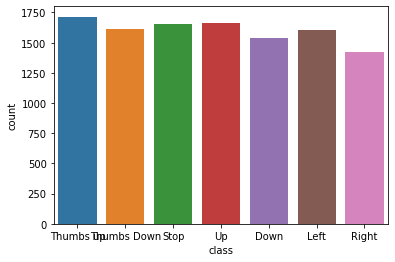

In [9]:
sns.countplot(data=df,x='class')

In [11]:
df.dropna(axis=0,inplace=True)